# 0. Imports

In [1]:
%pip install polars
import polars as pl
import numpy as np
import ast
%pip install seaborn
import seaborn as sns

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# 1. Dataset

In [12]:
%ls .

Eda.ipynb


In [2]:
df = pl.read_csv("../data-challenge-2025-rnp/train.csv")


In [3]:
df.head()
#Precisamos tirar média, desvio padrão, derivada, etc da coluna all_rtts

tr_id,tr_src,tr_dst,all_rtts,tr_attempts,total_probes_sent,total_replies_last_hop,route_changed,date_index,seconds_since_start
i64,i64,i64,str,i64,i64,i64,i64,i64,i64
0,0,0,"""[210.087]""",3,1,1,0,1,0
1,0,0,"""[210.087]""",3,1,1,0,1,0
2,0,0,"""[210.087]""",3,1,1,0,1,0
3,0,0,"""[210.087]""",3,1,1,0,1,0
4,0,0,"""[210.087]""",3,1,1,0,1,0


In [5]:
df.describe()
#Parece valer a pena fazer One Hot encoding no tr_dst
#Agora, podemos ter um OneHot para cada par src-dst, como temos 121 possíveis src e 12 possíveis dst, seriam 1452 combinações possíveis
#Por enquanto não vou fazer nada, mas acredito que tenhamos que gerar umas features e modificar algumas colunas (a mais óbvia é tirar estatísticas da all_rtts)

statistic,tr_id,tr_src,tr_dst,all_rtts,tr_attempts,total_probes_sent,total_replies_last_hop,route_changed,date_index,seconds_since_start
str,f64,f64,f64,str,f64,f64,f64,f64,f64,f64
"""count""",1.9965159e7,1.9965159e7,1.9965159e7,"""19965159""",1.9965159e7,1.9965159e7,1.9965159e7,1.9965159e7,1.9965159e7,1.9965159e7
"""null_count""",0.0,0.0,0.0,"""0""",0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",9.982579e6,52.772074,1.31823,null,3.0,1.440754,1.45145,0.018511,57.022974,4.8833e6
"""std""",5.7634e6,26.614277,1.349349,null,0.0,2.084357,2.46006,0.134789,29.308653,2.5327e6
"""min""",0.0,0.0,0.0,"""[0.109, 0.201, 0.439, 1.004, 0…",3.0,1.0,1.0,0.0,1.0,0.0
"""25%""",4.99129e6,31.0,1.0,null,3.0,1.0,1.0,0.0,39.0,3.358256e6
"""50%""",9.982579e6,51.0,1.0,null,3.0,1.0,1.0,0.0,59.0,5.019515e6
"""75%""",1.4973869e7,77.0,1.0,null,3.0,1.0,1.0,0.0,81.0,6.960632e6
"""max""",1.9965158e7,121.0,12.0,"""[9]""",3.0,50.0,77.0,1.0,107.0,9.165453e6


# 2. Análise Exploratória dos dados

In [4]:
df_polars = df.with_columns(
    # 1. Conversão da String para Lista
    # 'str.json_decode()' tenta analisar a string como JSON e retorna uma lista (List<float> por padrão), 
    # ou Null para strings inválidas/vazias/NaN, cumprindo a função do seu 'convert_to_list'.
    pl.col("all_rtts").str.json_decode(pl.List(pl.Float64)).alias("rtts_list")
)

In [6]:
df = df_polars.with_columns(
    # 2. Distribuição da Quantidade de RTTs
    # 'list.len()' retorna o tamanho de cada lista.
    # O tamanho de uma lista Null (obtida de uma string inválida) é Null.
    pl.col("rtts_list").list.len().alias("num_rtts")
)

df.head()

tr_id,tr_src,tr_dst,all_rtts,tr_attempts,total_probes_sent,total_replies_last_hop,route_changed,date_index,seconds_since_start,rtts_list,num_rtts
i64,i64,i64,str,i64,i64,i64,i64,i64,i64,list[f64],u32
0,0,0,"""[210.087]""",3,1,1,0,1,0,[210.087],1
1,0,0,"""[210.087]""",3,1,1,0,1,0,[210.087],1
2,0,0,"""[210.087]""",3,1,1,0,1,0,[210.087],1
3,0,0,"""[210.087]""",3,1,1,0,1,0,[210.087],1
4,0,0,"""[210.087]""",3,1,1,0,1,0,[210.087],1


In [8]:
distribuicao_contagem = df['num_rtts'].value_counts()

distribuicao_percentual = df['num_rtts'].value_counts(normalize=True) * 100

In [9]:
df['num_rtts'].head()

num_rtts
u32
1
1
1
1
1
1
1
1
1


In [10]:
df['num_rtts'].describe()

statistic,value
str,f64
"""count""",1.9965159e7
"""null_count""",0.0
"""mean""",1.45145
"""std""",2.46006
"""min""",1.0
"""25%""",1.0
"""50%""",1.0
"""75%""",1.0
"""max""",77.0


<Axes: xlabel='num_rtts'>

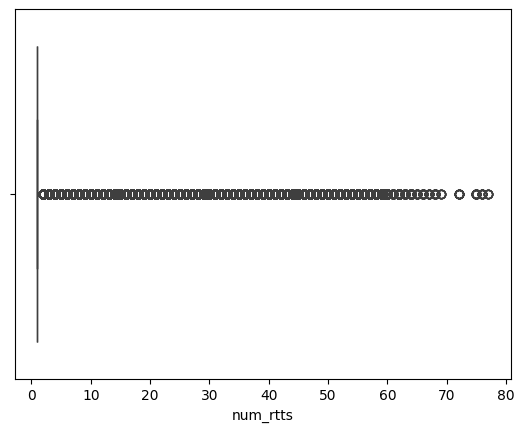

In [12]:
sns.boxplot(x=df['num_rtts'])

Agora criarei as métricas baseadas no par de src e dst, para criar linhas comparativas das estatísticas

In [7]:

# 1. Inicia o Pipeline no Modo Lazy (Otimização Máxima)
df_lazy = df.lazy()

# 2. Pipeline de Transformação Completo
df_quase_quase_final_lazy = (
    df_lazy
    # --- Parte 1: Preparação (Conversão e Contagem) ---
    .with_columns(
        # Converte string literal de lista para lista de floats (Lidar com aspas simples, se necessário)
        pl.col("all_rtts")
          .str.replace_all("'", '"') # Tenta garantir formato JSON
          .str.json_decode(pl.List(pl.Float64))
          .alias("rtts_list")
    )
    .with_columns(
        # Conta o número de RTTs (para usar na checagem do STD)
        pl.col("rtts_list").list.len().alias("num_rtts")
    )

    # --- Parte 2: Cálculo das Estatísticas por Linha (Min, Max, Mean, STD) ---
    .with_columns(
        pl.col("rtts_list").list.max().alias("rtt_max"),
        pl.col("rtts_list").list.min().alias("rtt_min"),
        pl.col("rtts_list").list.mean().alias("rtt_mean"),

        # STD ajustado: Se n <= 1, STD = 0.0
        pl.when(pl.col("num_rtts") <= 1)
          .then(0.0)
          .otherwise(pl.col("rtts_list").list.std())
          .alias("rtt_std"),
    )
    .with_columns(
        # Range Absoluto (usado nas próximas features)
        (pl.col("rtt_max") - pl.col("rtt_min")).alias("range_abs")
    )
    .with_columns(
        # Range Percentual
        pl.when(pl.col("range_abs") == 0)
          .then(0.0)
          .otherwise(pl.col("range_abs") / pl.col("rtt_mean"))
          .alias("rtt_range_perc"),

        # Range Normalizado por Max
        pl.when(pl.col("rtt_max") <= 0)
          .then(0.0)
          .otherwise(pl.col("range_abs") / pl.col("rtt_max"))
          .alias("rtt_range_norm_max")
    )

    # --- Parte 3: Cálculo da Baseline (Explode -> GroupBy) ---
    # Nota: Essa sub-query de baseline é um novo LazyFrame
    # O Polars é esperto o suficiente para otimizar isso em Lazy Mode
    .join(
        # Cálculo da Baseline
        df_lazy.select(["tr_src", "tr_dst", "rtts_list"])
            .explode("rtts_list")
            .group_by(["tr_src", "tr_dst"])
            .agg([
                pl.col("rtts_list").mean().alias("baseline_mean"),
                pl.col("rtts_list").std().alias("baseline_std"),
                pl.col("rtts_list").min().alias("baseline_min"),
            ]),
        on=["tr_src", "tr_dst"],
        how="left"
    )

    # --- Parte 4: Features de Desvio Relativo ---
    .with_columns(
        # Diferença de Média
        (pl.col("rtt_mean") - pl.col("baseline_mean")).alias("mean_diff"),

        # Razão de Média (Safe Division)
        pl.when(pl.col("baseline_mean") > 0)
          .then(pl.col("rtt_mean") / pl.col("baseline_mean"))
          .otherwise(None)
          .alias("mean_ratio"),

        # Razão de STD (Safe Division)
        pl.when(pl.col("baseline_std") > 0)
          .then(pl.col("rtt_std") / pl.col("baseline_std"))
          .otherwise(None)
          .alias("std_ratio"),

        # Max Atual vs. Min Histórico
        (pl.col("rtt_max") - pl.col("baseline_min")).alias("max_diff_min")
    )

    # Opcional: Remove colunas intermediárias para economizar memória antes de coletar
    .drop(["range_abs", "all_rtts"])
)


# 3. Execução (Apenas agora o Polars faz o trabalho pesado)
# O Polars tenta executar tudo de forma otimizada, streamando os dados.
df_resultado_final = df_quase_quase_final_lazy.collect(streaming=True)

/tmp/ipykernel_64576/2468916261.py:95: DeprecationWarning: the `streaming` parameter was deprecated in 1.25.0; use `engine` instead.
  df_resultado_final = df_quase_quase_final_lazy.collect(streaming=True)


In [8]:
df_resultado_final.head()

tr_id,tr_src,tr_dst,tr_attempts,total_probes_sent,total_replies_last_hop,route_changed,date_index,seconds_since_start,rtts_list,num_rtts,rtt_max,rtt_min,rtt_mean,rtt_std,rtt_range_perc,rtt_range_norm_max,baseline_mean,baseline_std,baseline_min,mean_diff,mean_ratio,std_ratio,max_diff_min
i64,i64,i64,i64,i64,i64,i64,i64,i64,list[f64],u32,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
199652,1,1,3,1,1,0,1,50164,[45.384],1,45.384,45.384,45.384,0.0,0.0,0.0,41.962404,25.217817,0.643,3.421596,1.08154,0.0,44.741
199653,1,1,3,1,1,0,1,50164,[45.384],1,45.384,45.384,45.384,0.0,0.0,0.0,41.962404,25.217817,0.643,3.421596,1.08154,0.0,44.741
199654,1,1,3,1,1,0,1,50164,[45.384],1,45.384,45.384,45.384,0.0,0.0,0.0,41.962404,25.217817,0.643,3.421596,1.08154,0.0,44.741
199655,14,2,3,5,5,1,1,50168,"[15.634, 15.08, … 118.718]",5,118.718,15.08,36.025,46.227304,2.876836,0.872976,26.020944,31.482134,13.481,10.004056,1.384462,1.468366,105.237
199656,14,2,3,5,5,0,1,50168,"[15.634, 15.08, … 118.718]",5,118.718,15.08,36.025,46.227304,2.876836,0.872976,26.020944,31.482134,13.481,10.004056,1.384462,1.468366,105.237


# 3. Seleção da variável alvo

Estamos analisando também um pouco da distribuição dos dados.

In [ ]:
y = df['route_changed']
X = df.drop(columns=['route_changed','tr_id','all_rtts'])

In [ ]:
X.head()

In [ ]:
X.describe()

In [ ]:
y.head()

In [ ]:
y.describe()
#Podemos ver que temos muito mais 0s que 1s, temos dados bem desbalanceados, temos que ver como vamos lidar com isso'

In [ ]:
y.value_counts()

# 4. Construção e Aplicação do modelo

O Google Colab não possui RAM suficiente para rodar o modelo, logo iremos rodar localmente

In [ ]:
#SEM RAM
#modelo_xgb = xgb.XGBClassifier(
#    objective='binary:logistic',
#    eval_metric='logloss',
#    use_label_encoder=False,
#    random_state=42
#)
#kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
#scores_f1 = cross_val_score(
#    estimator=modelo_xgb,
#    X=X,
#    y=y,
#    cv=kfold,
#    scoring='f1',
#    n_jobs=-1
#)
#print(f"F1-scores por fold: {scores_f1}")
#print(f"Média do F1-score: {scores_f1.mean():.4f}")
#print(f"Desvio Padrão do F1-score: {scores_f1.std():.4f}")

In [ ]:
#modelo_logistico = LogisticRegression(
#    solver='liblinear',
#    random_state=42,
#    n_jobs=-1
#)

In [ ]:
#kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#scores_f1 = cross_val_score(
#    estimator=modelo_logistico,
#    X=X,
#    y=y,
#    cv=kfold,
#    scoring='f1',
#    n_jobs=-1
#)

In [ ]:
#print(f"F1-scores por fold (Regressão Logística): {scores_f1}")
#print(f"Média do F1-score (Regressão Logística): {scores_f1.mean():.4f}")
#print(f"Desvio Padrão do F1-score (Regressão Logística): {scores_f1.std():.4f}")